In [205]:
import json
import re

In [229]:
data = {
    'moh_test_zh':{'path': 'moh/test_zh.json'},
    'moh_test_it':{'path': 'moh/test_it.json'}
}
for key in data.keys():
    with open(data[key]['path'], 'r') as f:
        data[key]['data'] = json.load(f)
data['moh_test_zh']['data']
i=-1

In [230]:

data['moh_test_zh']['data']

[{'id': 513,
  'text': 'The invaders @spread@ their language all over the country.\nyoudao: 侵略者 把 他们 的 语言 传播 到 全国 各地 。\ngoogle: 侵略者 将 他们 的 语言 传播 到 全国 各地 。\nopus: 入侵者 在 全国 各地 散布 他们 的 语言 。',
  '': '0',
  'metaphorical': '1',
  'label': ['google:full,N/A,5,5,5,5',
   'opus:misunderstanding,N/A,5,3,2,4',
   'ref:侵略者把他们的语言@传播@到全国各地 。que：full',
   'youdao:full,N/A,5,5,5,5'],
  'Comments': []},
 {'id': 514,
  'text': 'Sales were @climbing@ after prices were lowered.\nyoudao: 价格 降低 后 ， 销售量 上升 。\ngoogle: 价格 下调 后 销量 攀升 。\nopus: 价格 下跌 后 销售额 上升 。',
  '': '1',
  'metaphorical': '1',
  'label': ['google:  Full, Less, 5, 5, 5, 5',
   'opus: Non, Less, 5, 3, 4, 4',
   'reference: 价格 下跌 后，销售额@攀升@',
   'youdao：Non, Less, 5, 3, 2, 3'],
  'Comments': []},
 {'id': 515,
  'text': "The moon @glared@ back at itself from the lake's surface.\nyoudao: 月亮 在 湖面 上 反照 着 自己 。\ngoogle: 月亮 从 湖面 上 回 瞪 着 自己 。\nopus: 月亮 从 湖面 的 表面 闪闪发光",
  '': '2',
  'metaphorical': '1',
  'label': ['google:M M 3432',
   'opus:F S 5555',
 

###### 

In [36]:
def data_wash(data):
    for sam in data:
        sam['annotation'] = {'google':{},'youdao':{},'opus':{},'ref':{}}
        anno = sam['label']
        for a in anno:
            if re.search('google(.*)', a):
                google = re.search('google(.*)', a)[1]
                sam['annotation']['google']['equ'] = re.findall(':([a-zA-Z0-9/]*),', google)[0]
                sam['annotation']['google']['emo'] = re.findall(',([a-zA-Z0-9/]*)', google)[0]
                sam['annotation']['google']['q'] = re.findall(',([a-zA-Z0-9/]*)', google)[1:]
            elif re.search('youdao(.*)', a):
                youdao = re.search('youdao(.*)', a)[1]
                sam['annotation']['youdao']['equ'] = re.findall(':([a-zA-Z0-9/]*),', youdao)[0]
                sam['annotation']['youdao']['emo'] = re.findall(',([a-zA-Z0-9/]*)', youdao)[0]
                sam['annotation']['youdao']['q'] = re.findall(',([a-zA-Z0-9/]*)', youdao)[1:]
            elif re.search('opus(.*)', a):
                opus = re.search('opus(.*)', a)[1]
                sam['annotation']['opus']['equ'] = re.findall(':([a-zA-Z0-9/]*),', opus)[0]
                sam['annotation']['opus']['emo'] = re.findall(',([a-zA-Z0-9/]*)', opus)[0]
                sam['annotation']['opus']['q'] = re.findall(',([a-zA-Z0-9/]*)', opus)[1:]
            elif re.search('ref:(.*)', a):
                ref = re.search('ref:(.*)。', a)[1]
                print(ref)
        return sam


for key in data.keys():
    sam = data_wash(data[key]['data'])
    break
sam

侵略者把他们的语言@传播@到全国各地 


{'id': 513,
 'text': 'The invaders @spread@ their language all over the country.\nyoudao: 侵略者 把 他们 的 语言 传播 到 全国 各地 。\ngoogle: 侵略者 将 他们 的 语言 传播 到 全国 各地 。\nopus: 入侵者 在 全国 各地 散布 他们 的 语言 。',
 '': '0',
 'metaphorical': '1',
 'label': ['google:full,N/A,5,5,5,5',
  'opus:misunderstanding,N/A,5,3,2,4',
  'ref:侵略者把他们的语言@传播@到全国各地 。que：full',
  'youdao:full,N/A,5,5,5,5'],
 'Comments': [],
 'annotation': {'google': {'equ': 'full',
   'emo': 'N/A',
   'q': ['5', '5', '5', '5']},
  'youdao': {'equ': 'full', 'emo': 'N/A', 'q': ['5', '5', '5', '5']},
  'opus': {'equ': 'misunderstanding', 'emo': 'N/A', 'q': ['5', '3', '2', '4']},
  'ref': {}}}

In [226]:
import csv
path = 'moh/test_zh.csv'
zh_data = []

with open(path, newline='') as f:
    reader = csv.reader(f, delimiter=' ', quotechar='|')
    i=0 
    for line in reader:
        if i>256:
            zh_data.append(line[0].split(','))
        i+=1
        
meta = zh_data[:37]
liter = zh_data[37:]
#check_data = liter
chech_data = meta

anno_data = {'google':{}, 'youdao':{}, 'opus':{}}
for key in anno_data.keys():
    anno_data[key]['equivalent'] = []
    anno_data[key]['emotion'] = []
    anno_data[key]['fluency'] = []
    anno_data[key]['intelligibility'] = []
    anno_data[key]['fidelity'] = []
    anno_data[key]['authentic'] = []
for sam in check_data:
    k = 1
    for key in anno_data.keys():
        if sam[k] == 'full':
            anno_data[key]['equivalent'].append('full')
        elif sam[k] == 'part':
            anno_data[key]['equivalent'].append('part')
        elif sam[k] == 'non':
            anno_data[key]['equivalent'].append('non')
        elif sam[k] == 'mis':
            anno_data[key]['equivalent'].append('mis')
        elif sam[k] == 'error':
            anno_data[key]['equivalent'].append('error')
        else:
            mis += 1
        
        if sam[k+1] == 'more':
            anno_data[key]['emotion'].append('more')
        elif sam[k+1] == 'same':
            anno_data[key]['emotion'].append('same')
        elif sam[k+1] == 'less':
            anno_data[key]['emotion'].append('less')
        elif sam[k+1] == 'non':
            anno_data[key]['emotion'].append('non')
        else:
            mis += 1
            
        
        anno_data[key]['fluency'].append(int(sam[k+2]))
        anno_data[key]['intelligibility'].append(int(sam[k+3]))
        anno_data[key]['fidelity'].append(int(sam[k+4]))
        anno_data[key]['authentic'].append(int(sam[k+5]))
        
        k+=6
#meta[0]
anno_data['google']['equivalent']

['full',
 'part',
 'mis',
 'full',
 'full',
 'part',
 'full',
 'part',
 'mis',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'full',
 'part',
 'full',
 'mis']

/var/folders/qq/pb67vd4x7dn0tbkk5tcdpydc0000gn/T/ipykernel_3879/878971911.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = x.mean()
/var/folders/qq/pb67vd4x7dn0tbkk5tcdpydc0000gn/T/ipykernel_3879/878971911.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = x.mean()
/var/folders/qq/pb67vd4x7dn0tbkk5tcdpydc0000gn/T/ipykernel_3879/878971911.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = x.mean()


<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

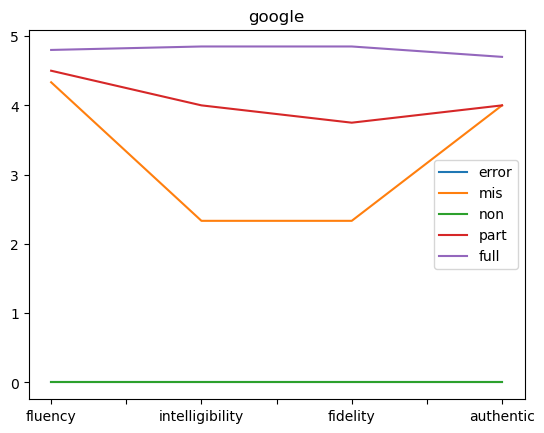

<Figure size 640x480 with 0 Axes>

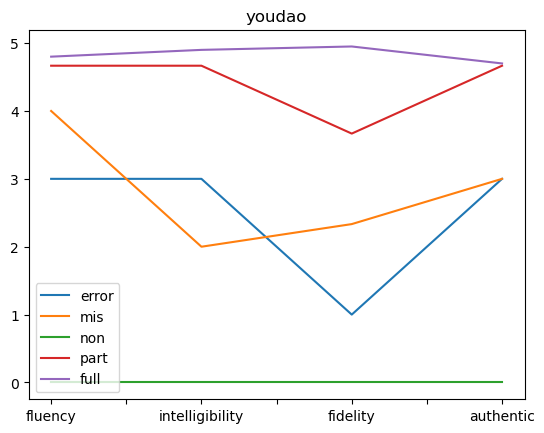

<Figure size 640x480 with 0 Axes>

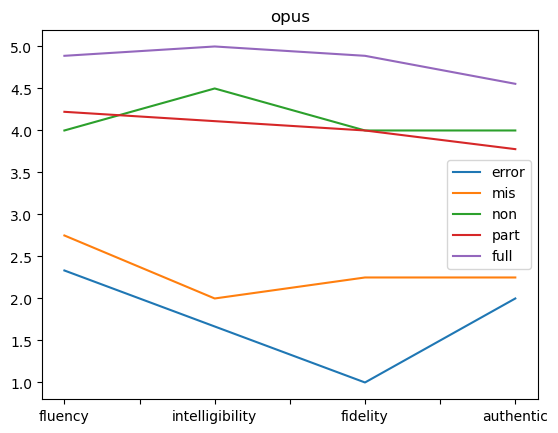

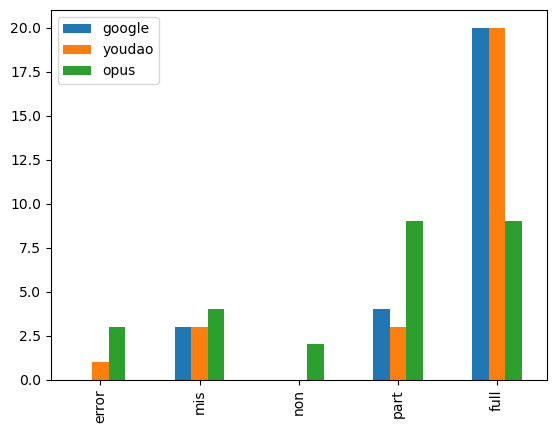

In [227]:
import pandas as pd
import matplotlib.pyplot as mp
'''
ax = google_quality.plot.scatter(x='equivalent', y='fluency', color='red', label='fluency')
ax = google_quality.plot.scatter(x='equivalent', y='intelligibility', color='yellow', label='intelligibility', ax=ax)
ax = google_quality.plot.scatter(x='equivalent', y='fidelity', color='green', label='fidelity', ax=ax)
google_quality.plot.scatter(x='equivalent', y='authentic', color='blue', label='authentic', ax=ax)
'''

def get_avg(dic, name):
    avg = {'fluency':[], 'intelligibility':[], 'fidelity':[], 'authentic':[]}
    for equ in ['error', 'mis', 'non', 'part', 'full']:
        x=dic.loc[dic['equivalent'] == equ]
        a = x.mean()
        avg['fluency'].append(a['fluency']) if a['fluency']>0 else avg['fluency'].append(0) 
        avg['intelligibility'].append(a['intelligibility']) if a['intelligibility']>0 else avg['intelligibility'].append(0) 
        avg['fidelity'].append(a['fidelity']) if a['fidelity']>0 else avg['fidelity'].append(0) 
        avg['authentic'].append(a['authentic']) if a['authentic']>0 else avg['authentic'].append(0) 
    avg = pd.DataFrame(avg, index=['error', 'mis', 'non', 'part', 'full'], columns=['fluency', 'intelligibility', 'fidelity', 'authentic'])
    avg = avg.T
    mp.figure()
    avg.plot(title=name)

def get_num(dic):
    num = []
    for equ in ['error', 'mis', 'non', 'part', 'full']:
        x=dic.loc[dic['equivalent'] == equ]
        n = len(x)
        num.append(n)
    return num
    #num = pd.DataFrame(num, index=['error', 'mis', 'non', 'part', 'full'])
    #num.plot.bar()

num = []
for model in ['google', 'youdao', 'opus']:
    data = anno_data[model]
    quality = pd.DataFrame(data)

    get_avg(quality, model)
    num.append(get_num(quality))

num = pd.DataFrame(num, columns=['error', 'mis', 'non', 'part', 'full'], index=['google', 'youdao', 'opus'])
num = num.T
num.plot.bar()


#google_quality = pd.DataFrame([google['equivalent'], google['fluency'], google['intelligibility'], google['fidelity'], google['authentic']], \
    #columns=['equivalence', 'fluency', 'intelligibility', 'fidelity', 'authentic'])

#google_quality.plot(x='equivalent', y='fluency', kind='bar')
#mp.show()
    